<a href="https://colab.research.google.com/github/franfasan1/DH_G8_desafio3/blob/main/notebook_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
data = pd.read_csv('bank_customer_survey.csv')

In [8]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0


# Análisis Exploratorio

Antes de empezar a trabajar en el modelo de clasificación es importante visualziar los datos, validar su estructura y entender las relaciones entre las variables

Comencemos analizando la existencia o no de valores nulos

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


Se observa entonces que hay 45211 registros con 16 features a analizar y por suerte ningún valor nulo!!! (vamoooooooo!)

Además se ve que los tipos de dato son bastante coherentes con lo que se ve reflejado en el vistazo que le dimos a la tabla. En este sentido, una variable a la que podríamos cambiarle su "tipo" es ***day*** ya que representa el día de la semana y no tiene sentido que sea numérica, sino **categórica**.


In [11]:
data['day'] = data.day.astype('category')

Ya que estamos convertimos todos los datos que entendemos categoricos a *category*

In [15]:
columnas = data.columns

for col in columnas:
  if data[col].dtype == 'object':
    data[col] = data[col].astype('category')

Ahora que tenemos todo esto medio armado podemos empezar a analizar nuestra data. Empecemos estudiando como se distribuye cada una de las variables según la respuesta que buscamos, para después pasar a ver como se relacionan entre ellas

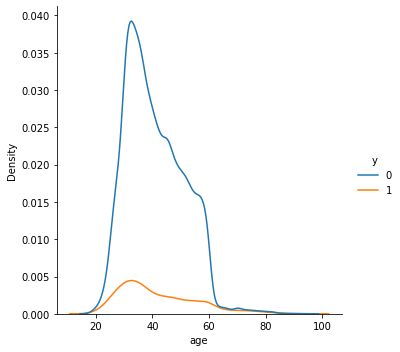

In [29]:
sns.displot(data = data, x = 'age', hue = 'y', legend = True, kind = 'kde')

,job


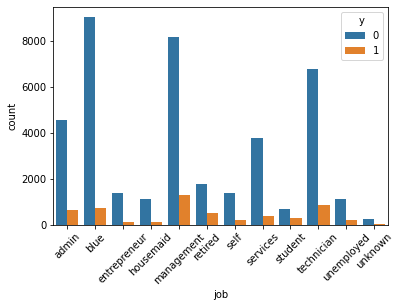

In [43]:
g = sns.countplot(x = 'job', hue = 'y', data = data)
g.set_xticklabels(g.get_xticklabels(), minor = False, rotation = 45);

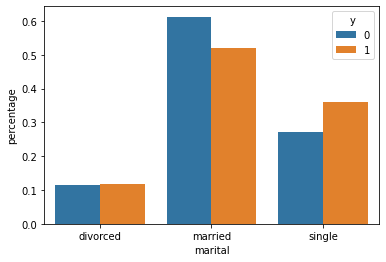

In [54]:
a = data.groupby('y')['marital'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'marital', y = 'percentage', hue = 'y', data = a)

Se observa claramente que los solteros y los divorciados tienen una tendencia superior a realizar depósitos en plazo fijo mayor a los casados

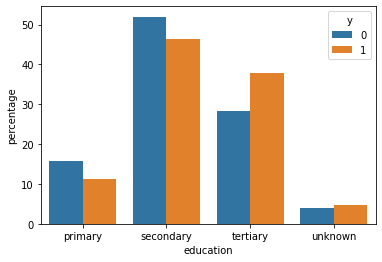

In [55]:
a = data.groupby('y')['education'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'education', y = 'percentage', hue = 'y', data = a)

A priori parece algo razonable pensar que las personas con mayor nivel educativo son mas propensos a realizar depósitos a plazo fijo, tal vez pueda ser que su excedente monetario sea mayor que en el resto de los casos o porque tienen mayor educación financiera. Se ven un pequeño porcentaje de *unkowns* que representan valores nulos y deberíamos imputarlos o removerlos

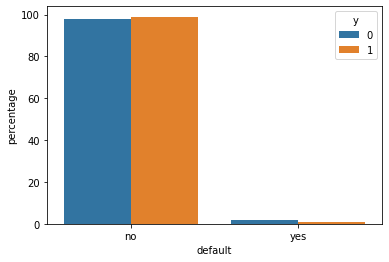

In [56]:
a = data.groupby('y')['default'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'default', y = 'percentage', hue = 'y', data = a)

Resulta bastante lógico pensar que los casos con default crediticio ni siquiera sean contactados para ofrecerles un plazo fijo, y que en caso de sean contactados, la tasa de aceptación sea menor